<a href="https://colab.research.google.com/github/vadim-vic/Causal-Inference/blob/main/code_sandbox/LinGam_for_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 6.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=3f925c5304f83e51400cd3c87ebc177f10ad4c9da0e885f5a95607d718fa6fef
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
import numpy as np

np.random.seed(0)
T = 1000

e = np.random.laplace(size=(T, 3))  # non-Gaussian noise
X = np.zeros((T, 3))

for t in range(1, T):
    X[t, 0] = e[t, 0]
    X[t, 1] = 0.8 * X[t-1, 0] + e[t, 1]
    X[t, 2] = 0.6 * X[t-1, 1] + e[t, 2]


In [ ]:
from lingam import VARLiNGAM

model = VARLiNGAM(lags=1)
model.fit(X)


In [ ]:
print("Instantaneous effects B0:")
print(model.adjacency_matrices_[0])

print("\nLag-1 effects B1:")
print(model.adjacency_matrices_[1])


Instantaneous effects B0:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Lag-1 effects B1:
[[0.         0.         0.        ]
 [0.80452076 0.         0.        ]
 [0.         0.6192906  0.        ]]


In [ ]:
print("Instantaneous effects B0:")
print(model.adjacency_matrices_[0])

print("\nLag-1 effects B1:")
print(model.adjacency_matrices_[1])


Instantaneous effects B0:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Lag-1 effects B1:
[[0.         0.         0.        ]
 [0.80452076 0.         0.        ]
 [0.         0.6192906  0.        ]]


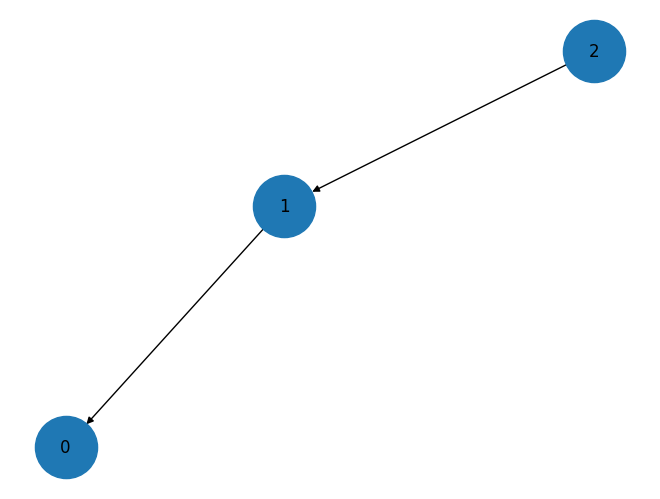

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

B1 = model.adjacency_matrices_[1]
G = nx.DiGraph(B1)

nx.draw(G, with_labels=True, node_size=2000)
plt.show()


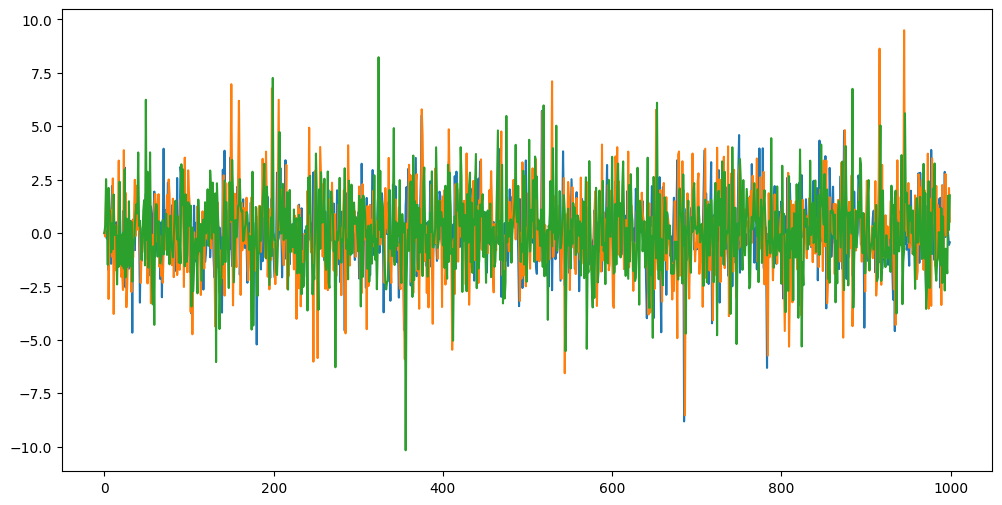

In [ ]:
# plot the time series
plt.figure(figsize=(12, 6))
plt.plot(X[:, 0], label='X1')
plt.plot(X[:, 1], label='X2')
plt.plot(X[:, 2], label='X3')